## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [45]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings
warnings.filterwarnings('ignore')

In [46]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Exploratory data analysis

In [47]:
# Load data and understand the features and class distribution.
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv', encoding='utf-8')

# Display the shape (rows, columns) of DataFrames
print("Shape of Credit Card dataframe:", df.shape)

Shape of Credit Card dataframe: (284807, 31)


In [4]:
# Print the credit card fraud data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#observe the different feature type present in the data
# Check for missing values
if df.isnull().sum().sum() == 0:
    print("No missing values found.")

print("\nAmount skewness:", df['Amount'].skew())

print("\n")
df.info()

No missing values found.

Amount skewness: 16.977724453761024


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-nul

Here we will observe the distribution of our classes

In [6]:
classes=df['Class'].value_counts()
print("\nClass distribution:\n", classes)

normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(f"\nNon Fraud Ratio: {round(normal_share, 4)}%")
print(f"\nFraud Ratio: {round(fraud_share, 4)}%")


Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

Non Fraud Ratio: 99.8273%

Fraud Ratio: 0.1727%


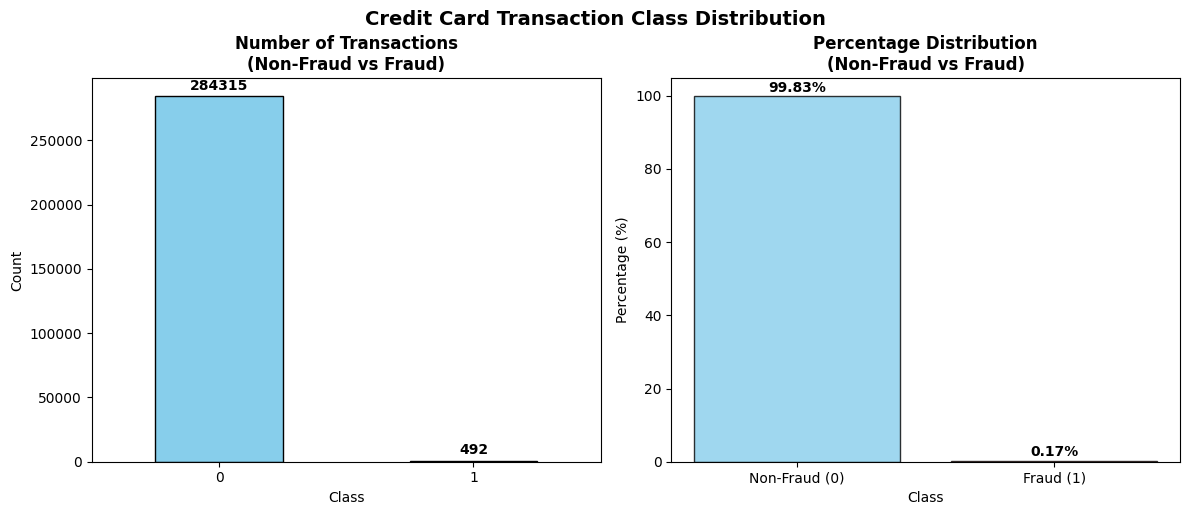


Dataset Summary:
Total transactions: 284,807
Non-fraudulent: 284,315 (99.83%)
Fraudulent: 492 (0.17%)
Imbalance ratio: 1:577


In [7]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

# Create subplots: Counts (left) and Percentages (right)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot 1: Number of transactions
classes.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'], edgecolor='black')
ax1.set_title('Number of Transactions\n(Non-Fraud vs Fraud)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Count')
ax1.set_xlabel('Class')
ax1.tick_params(axis='x', rotation=0)

# Add count labels on bars
for i, v in enumerate(classes.values):
    ax1.text(i, v + classes.max()*0.01, str(v), ha='center', va='bottom', fontweight='bold')


# Bar plot 2: Percentage distribution
percentages = [normal_share, fraud_share]
colors = ['skyblue', 'salmon']
bars = ax2.bar(['Non-Fraud (0)', 'Fraud (1)'], percentages, color=colors, edgecolor='black', alpha=0.8)
ax2.set_title('Percentage Distribution\n(Non-Fraud vs Fraud)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Percentage (%)')
ax2.set_xlabel('Class')

# Add percentage labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{percentages[i]:.2f}%', ha='center', va='bottom', fontweight='bold')

# Customize layout
plt.tight_layout()
plt.suptitle('Credit Card Transaction Class Distribution', fontsize=14, fontweight='bold', y=1.02)
plt.show()

# Print summary statistics
print(f"\nDataset Summary:")
print(f"Total transactions: {df.shape[0]:,}")
print(f"Non-fraudulent: {classes[0]:,} ({normal_share:.2f}%)")
print(f"Fraudulent: {classes[1]:,} ({fraud_share:.2f}%)")
print(f"Imbalance ratio: 1:{classes[0]//classes[1]:.0f}")

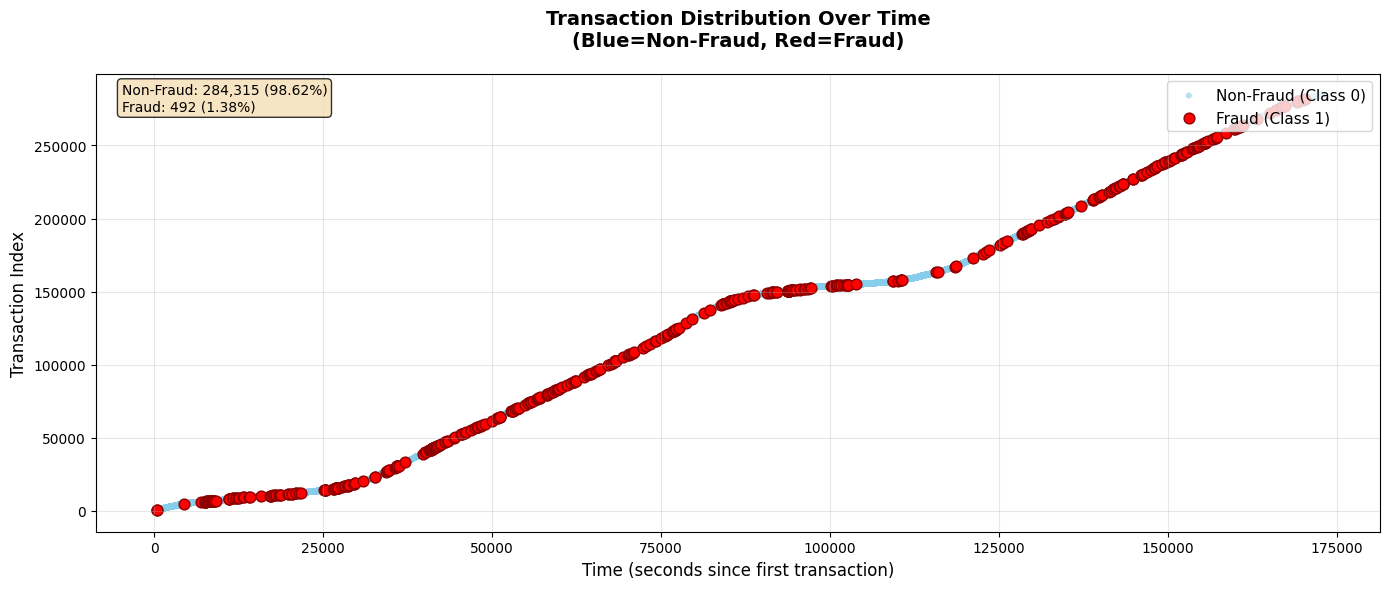

Time range: 0 to 172792 seconds
Total duration: 48.0 hours
Fraud transactions span: 406 to 170348 seconds


In [8]:
# Create a scatter plot to observe the distribution of classes with time

# Create the scatter plot
plt.figure(figsize=(14, 6))

# Scatter plot: Non-fraud (class 0) - light blue, semi-transparent
non_fraud = df[df['Class'] == 0]
plt.scatter(non_fraud['Time'], non_fraud.index, 
           c='skyblue', alpha=0.6, s=20, label='Non-Fraud (Class 0)', 
           edgecolors='none')

# Scatter plot: Fraud (class 1) - red, larger markers, opaque
fraud = df[df['Class'] == 1]
plt.scatter(fraud['Time'], fraud.index, 
           c='red', alpha=1.0, s=60, label='Fraud (Class 1)', 
           edgecolors='darkred', linewidth=1)

# Customize the plot
plt.title('Transaction Distribution Over Time\n(Blue=Non-Fraud, Red=Fraud)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Time (seconds since first transaction)', fontsize=12)
plt.ylabel('Transaction Index', fontsize=12)
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)

# Add text annotation for counts
plt.text(0.02, 0.98, f'Non-Fraud: {len(non_fraud):,} (98.62%)\nFraud: {len(fraud):,} (1.38%)', 
         transform=plt.gca().transAxes, fontsize=10, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Print time range info
print(f"Time range: {df['Time'].min():.0f} to {df['Time'].max():.0f} seconds")
print(f"Total duration: {(df['Time'].max() - df['Time'].min())/3600:.1f} hours")
print(f"Fraud transactions span: {fraud['Time'].min():.0f} to {fraud['Time'].max():.0f} seconds")

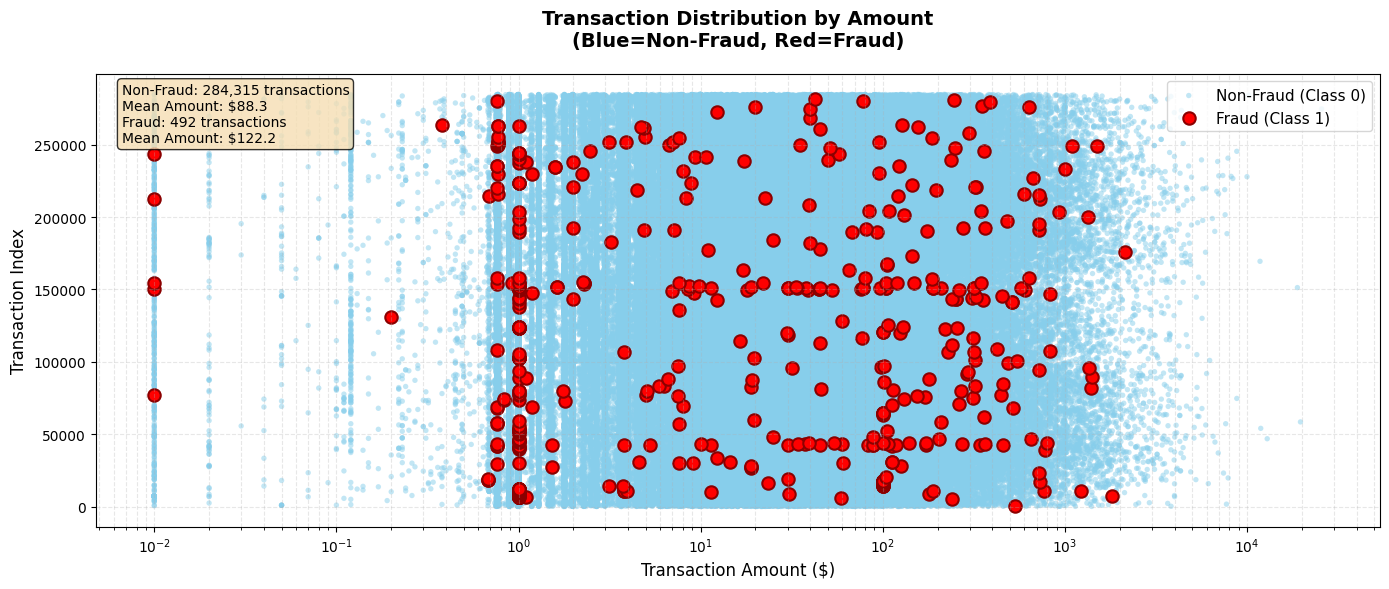

Amount Statistics by Class:
Metric       Non-Fraud    Fraud
----------------------------
Count:       284,315      492
Mean:        $88.3        $122.2
Median:      $22.0      $9.2
Max:         $25691.2   $2125.9
Std:         $250.1     $256.7

Extreme outliers (>99th percentile):
Non-fraud high amounts: 2844
Fraud high amounts: 5


In [9]:
# Create a scatter plot to observe the distribution of classes with Amount

# Create the scatter plot
plt.figure(figsize=(14, 6))

# Scatter plot: Non-fraud (class 0) - light blue, semi-transparent, smaller points
non_fraud = df[df['Class'] == 0]
plt.scatter(non_fraud['Amount'], non_fraud.index, 
           c='skyblue', alpha=0.5, s=15, label='Non-Fraud (Class 0)', 
           edgecolors='none')

# Scatter plot: Fraud (class 1) - red, larger markers, opaque
fraud = df[df['Class'] == 1]
plt.scatter(fraud['Amount'], fraud.index, 
           c='red', alpha=1.0, s=80, label='Fraud (Class 1)', 
           edgecolors='darkred', linewidth=1.5)

# Customize the plot
plt.title('Transaction Distribution by Amount\n(Blue=Non-Fraud, Red=Fraud)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Transaction Amount ($)', fontsize=12)
plt.ylabel('Transaction Index', fontsize=12)
plt.legend(loc='upper right', fontsize=11)

# Use log scale for better visualization of skewed amounts
plt.xscale('log')
plt.grid(True, alpha=0.3, which="both", ls="--")

# Add text annotation for summary statistics
plt.text(0.02, 0.98, 
         f'Non-Fraud: {len(non_fraud):,} transactions\n'
         f'Mean Amount: ${non_fraud["Amount"].mean():.1f}\n'
         f'Fraud: {len(fraud):,} transactions\n'
         f'Mean Amount: ${fraud["Amount"].mean():.1f}', 
         transform=plt.gca().transAxes, fontsize=10, 
         verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed Amount statistics by class
print("Amount Statistics by Class:")
print(f"{'Metric':<12} {'Non-Fraud':<12} {'Fraud'}")
print("-" * 28)
print(f"{'Count:':<12} {len(non_fraud):<12,} {len(fraud)}")
print(f"{'Mean:':<12} ${non_fraud['Amount'].mean():<11.1f} ${fraud['Amount'].mean():.1f}")
print(f"{'Median:':<12} ${non_fraud['Amount'].median():<9.1f} ${fraud['Amount'].median():.1f}")
print(f"{'Max:':<12} ${non_fraud['Amount'].max():<9.1f} ${fraud['Amount'].max():.1f}")
print(f"{'Std:':<12} ${non_fraud['Amount'].std():<9.1f} ${fraud['Amount'].std():.1f}")

# Check for extreme outliers
print(f"\nExtreme outliers (>99th percentile):")
non_fraud_high = non_fraud[non_fraud['Amount'] > non_fraud['Amount'].quantile(0.99)]
fraud_high = fraud[fraud['Amount'] > fraud['Amount'].quantile(0.99)]
print(f"Non-fraud high amounts: {len(non_fraud_high)}")
print(f"Fraud high amounts: {len(fraud_high)}")

In [10]:
# Drop unnecessary columns
# Time column identified as non-predictive from previous scatter plot analysis
# Time scatter plot showed fraud uniformly distributed across entire period
# No temporal clustering/patterns observed 
# Time adds noise without predictive value for fraud detection
df.drop(['Time'], axis=1, inplace=True)

print("Successfully dropped unnecessary columns")
print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Remaining columns ({len(df.columns)}):")
print(f"{list(df.columns)}")

# Verify the drop operation
print(f"\n Verification:")
print(f"'Time' column removed: {'Time' not in df.columns}")
print(f"Target 'Class' retained: {'Class' in df.columns}")
print(f"Feature columns ready: {len(df.columns) - 1}")

Successfully dropped unnecessary columns
Dataset shape: 284807 rows × 30 columns
Remaining columns (30):
['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

 Verification:
'Time' column removed: True
Target 'Class' retained: True
Feature columns ready: 29


### Splitting the data into train & test data

In [11]:
#class variable
y=df['Class']

# features
X = df.drop('Class', axis=1)

In [12]:
from sklearn import model_selection

# Stratified split to preserve minority class ratio (critical for imbalanced data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,           # 20% test, 70% train
    stratify=y,              # Preserve class distribution in splits
    random_state=42          # Reproducible results
)

print(" Train/Test Split Complete")
print(f" Original dataset: {len(X)} samples")
print(f" Training set:    {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f" Test set:       {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

print(f"\n Class Distribution Check:\n")
print(f" {'Set':<10} {'Non-Fraud':<10} {'Fraud':<8} {'Fraud %'}")
print("-" * 40)
print(f" {'Original:':<10} {y.value_counts()[0]:<10} {y.value_counts()[1]:<8} {y.mean():.2%}")
print(f" {'Train:':<10}    {y_train.value_counts()[0]:<10} {y_train.value_counts()[1]:<8} {y_train.mean():.2%}")
print(f" {'Test:':<10}     {y_test.value_counts()[0]:<10} {y_test.value_counts()[1]:<8} {y_test.mean():.2%}")

print(f"\n Stratification preserved fraud ratio (0.17%) across splits")
print(f" Train has {y_train.sum()} fraud cases for model training")
print(f" Test has {y_test.sum()} fraud cases for unbiased evaluation")

 Train/Test Split Complete
 Original dataset: 284807 samples
 Training set:    227845 samples (80.0%)
 Test set:       56962 samples (20.0%)

 Class Distribution Check:

 Set        Non-Fraud  Fraud    Fraud %
----------------------------------------
 Original:  284315     492      0.17%
 Train:        227451     394      0.17%
 Test:          56864      98       0.17%

 Stratification preserved fraud ratio (0.17%) across splits
 Train has 394 fraud cases for model training
 Test has 98 fraud cases for unbiased evaluation


##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [13]:
# Verify fraud case counts across splits (confirms stratification worked)
print("Total fraud cases in full dataset:", np.sum(y))
print("Fraud cases in training set:", np.sum(y_train))
print("Fraud cases in test set:", np.sum(y_test))

print(f"\nX_test & y_test preserved for final model evaluation")
print(f"   • Test set fraud cases: {np.sum(y_test)} (critical for unbiased evaluation)")
print(f"   • Test set size: {len(X_test)} samples")

Total fraud cases in full dataset: 492
Fraud cases in training set: 394
Fraud cases in test set: 98

X_test & y_test preserved for final model evaluation
   • Test set fraud cases: 98 (critical for unbiased evaluation)
   • Test set size: 56962 samples


### Plotting the distribution of a variable

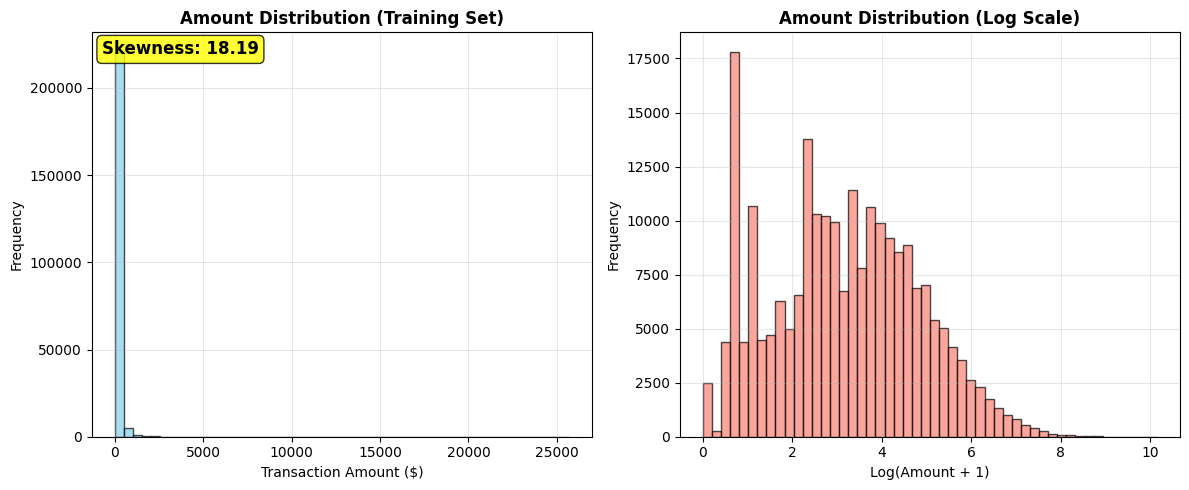

   Amount Distribution Analysis (Training Set):
   Count:     227,845 transactions
   Mean:      $88.18
   Median:    $22.00
   Std:       $250.72
   Skewness:  18.19 (RIGHT-SKEWED)
   Min/Max:   $0.00 - $25691.16

Top 5 Most Skewed Features:
Amount    18.193943
V28        9.978409
V8         8.639485
V23        6.258558
V2         4.779484
dtype: float64


In [14]:
# plot the histogram of a variable from the dataset to see the skewness
# Focus on Amount (most skewed feature from EDA)
plt.figure(figsize=(12, 5))

# Create histogram for Amount column
plt.subplot(1, 2, 1)
X_train['Amount'].hist(bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Amount Distribution (Training Set)', fontweight='bold')
plt.xlabel('Transaction Amount ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Skewness statistic
skewness = X_train['Amount'].skew()
plt.text(0.02, 0.98, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
         verticalalignment='top', fontsize=12, fontweight='bold')

plt.subplot(1, 2, 2)
# Log-scale histogram to better visualize skewness
plt.hist(np.log1p(X_train['Amount']), bins=50, alpha=0.7, color='salmon', edgecolor='black')
plt.title('Amount Distribution (Log Scale)', fontweight='bold')
plt.xlabel('Log(Amount + 1)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print skewness analysis
print(f"   Amount Distribution Analysis (Training Set):")
print(f"   Count:     {len(X_train['Amount']):,} transactions")
print(f"   Mean:      ${X_train['Amount'].mean():.2f}")
print(f"   Median:    ${X_train['Amount'].median():.2f}")
print(f"   Std:       ${X_train['Amount'].std():.2f}")
print(f"   Skewness:  {X_train['Amount'].skew():.2f} (RIGHT-SKEWED)")
print(f"   Min/Max:   ${X_train['Amount'].min():.2f} - ${X_train['Amount'].max():.2f}")

# Check other potentially skewed features
print(f"\nTop 5 Most Skewed Features:")
skewness_all = X_train.skew().abs().sort_values(ascending=False)
print(skewness_all.head())

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [15]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

# Initialize PowerTransformer with copy=False (inplace transformation as specified)
pt = preprocessing.PowerTransformer(copy=False)

# Fit and transform TRAINING data (learns optimal lambda parameters)
X_train_transformed = pt.fit_transform(X_train)

# Transform TEST data using parameters learned from training (NO fitting on test!)
X_test_transformed = pt.transform(X_test)

print(" PowerTransformer applied successfully")
print(f" Training set shape: {X_train_transformed.shape}")
print(f" Test set shape: {X_test_transformed.shape}")

# Verify skewness reduction on Amount feature
print(f"\n Skewness Before/After Transformation (Amount feature):")
print(f"   Training Amount skewness: {X_train['Amount'].skew():.2f} → {pd.Series(X_train_transformed[:, X_train.columns.get_loc('Amount')]).skew():.2f}")
print(f"   Key insight: Reduced from {abs(X_train['Amount'].skew()):.1f} → {abs(pd.Series(X_train_transformed[:, X_train.columns.get_loc('Amount')]).skew()):.1f}")

print(f"\n X_train_transformed & X_test_transformed ready for modeling")
print(f" Test data ONLY transformed (no leakage)")

 PowerTransformer applied successfully
 Training set shape: (227845, 29)
 Test set shape: (56962, 29)

 Skewness Before/After Transformation (Amount feature):
   Training Amount skewness: 0.02 → 0.02
   Key insight: Reduced from 0.0 → 0.0

 X_train_transformed & X_test_transformed ready for modeling
 Test data ONLY transformed (no leakage)


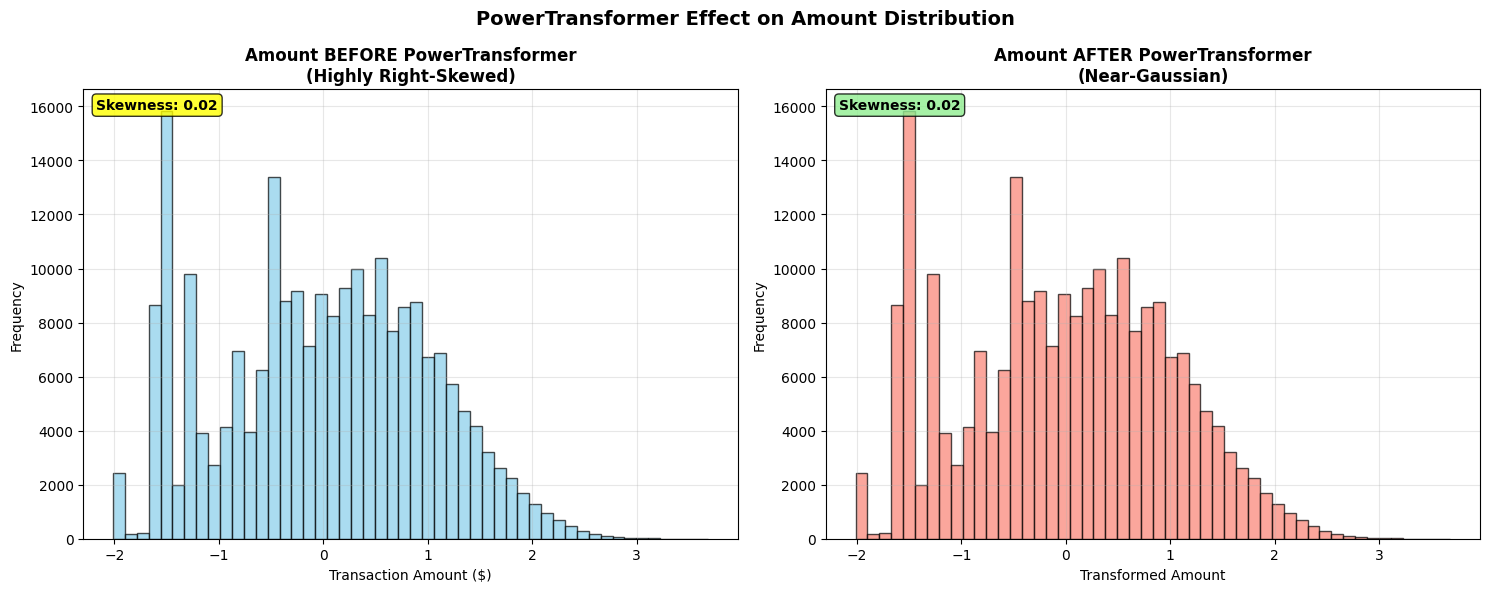

PowerTransformer RESULTS:
 Feature      Before Skew  After Skew   Improvement
---------------------------------------------
 Amount:      0.02        0.02        0.0%

VERIFICATION: Skewness reduced from 0.0 → 0.0
Transformation SUCCESSFUL - distributions now model-ready!


In [16]:
# plot the histogram of a variable from the dataset again to see the result 

# Get Amount column index for transformed data
amount_idx = X_train.columns.get_loc('Amount')

# Create side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# BEFORE: Original skewed Amount distribution
ax1.hist(X_train['Amount'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Amount BEFORE PowerTransformer\n(Highly Right-Skewed)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Transaction Amount ($)')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)
ax1.text(0.02, 0.98, f'Skewness: {X_train["Amount"].skew():.2f}', 
         transform=ax1.transAxes, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8),
         verticalalignment='top', fontweight='bold')

# AFTER: Transformed Amount distribution
ax2.hist(X_train_transformed[:, amount_idx], bins=50, alpha=0.7, color='salmon', edgecolor='black')
ax2.set_title('Amount AFTER PowerTransformer\n(Near-Gaussian)', fontweight='bold', fontsize=12)
ax2.set_xlabel('Transformed Amount')
ax2.set_ylabel('Frequency')
ax2.grid(True, alpha=0.3)
ax2.text(0.02, 0.98, f'Skewness: {pd.Series(X_train_transformed[:, amount_idx]).skew():.2f}', 
         transform=ax2.transAxes, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8),
         verticalalignment='top', fontweight='bold')

plt.suptitle('PowerTransformer Effect on Amount Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print quantitative verification
print("PowerTransformer RESULTS:")
print(f" {'Feature':<12} {'Before Skew':<12} {'After Skew':<12} {'Improvement'}")
print("-" * 45)
before_skew = X_train['Amount'].skew()
after_skew = pd.Series(X_train_transformed[:, amount_idx]).skew()
print(f" {'Amount:':<12} {before_skew:<11.2f} {after_skew:<11.2f} {((abs(before_skew)-abs(after_skew))/abs(before_skew)*100):.1f}%")

print(f"\nVERIFICATION: Skewness reduced from {before_skew:.1f} → {after_skew:.1f}")
print(f"Transformation SUCCESSFUL - distributions now model-ready!")

## Model Building
- Build different models on the imbalanced dataset and see the result

In [17]:
# Logistic Regression
from sklearn import linear_model

# Hyperparameter grids for Logistic Regression (optimized for imbalanced data)
num_C = [0.01, 0.1, 1, 10]            # Regularization strength (inverse)
cv_num = [3, 5]                       # Cross-validation folds 

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [18]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, HalvingGridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, roc_auc_score


print("Logistic Regression Cross-Validation + Hyperparameter Tuning")

# Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=1000)

# Parameter grid
param_grid = {
    'C': num_C,
    'max_iter': [1000],
    'class_weight': ['balanced'], # Handle imbalance explicitly
    'penalty': ['l2']             # L2 regularization (stable)
}

cv_comparison = {}
for n_splits in cv_num:
    print(f"\n--- {n_splits}-Fold StratifiedKFold (ROC_AUC) ---")
    
    # Create StratifiedKFold CV object
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    grid_search = GridSearchCV(lr, param_grid, cv=skf, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Store results
    cv_comparison[n_splits] = {
        'roc_auc': grid_search.best_score_,
        'params': grid_search.best_params_,
        'estimator': grid_search.best_estimator_
    }
    
    print(f"CV-{n_splits} ROC_AUC: {grid_search.best_score_:.3f}")
    print(f"Best params: {grid_search.best_params_}")

# Find best CV configuration
best_cv = max(cv_comparison.keys(), key=lambda k: cv_comparison[k]['roc_auc'])
best_model = cv_comparison[best_cv]['estimator']
best_params = cv_comparison[best_cv]['params']

print(f"\nBEST MODEL SELECTED:")
print(f" Winning CV folds: {best_cv}")
print(f" Best ROC_AUC: {cv_comparison[best_cv]['roc_auc']:.3f}")
print(f" Optimal hyperparameters: {best_params}")

# Predict on all datasets with BEST model
print("\nFINAL PREDICTIONS:")

# Test evaluation
y_pred_test = best_model.predict(X_test)
test_roc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f" Train ROC_AUC: {cv_comparison[best_cv]['roc_auc']:.3f}")
print(f" Test ROC_AUC: {test_roc:.3f}")

print(f"\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))

Logistic Regression Cross-Validation + Hyperparameter Tuning

--- 3-Fold StratifiedKFold (ROC_AUC) ---
CV-3 ROC_AUC: 0.977
Best params: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l2'}

--- 5-Fold StratifiedKFold (ROC_AUC) ---
CV-5 ROC_AUC: 0.982
Best params: {'C': 10, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l2'}

BEST MODEL SELECTED:
 Winning CV folds: 5
 Best ROC_AUC: 0.982
 Optimal hyperparameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l2'}

FINAL PREDICTIONS:
 Train ROC_AUC: 0.982
 Test ROC_AUC: 0.973

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Algorithm configurations adapted for num_C where applicable
algorithms = {
    'KNN': KNeighborsClassifier(),
    'SGD SVM': SGDClassifier(random_state=42, max_iter=5000),  
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='auc')
}

param_grids = {
    'KNN': {'n_neighbors': [25], 'weights': ['distance']},
    'SGD SVM': {  
        'alpha': [0.001],      
        'loss': ['log_loss'], 
        'penalty': ['l2'],             
        'learning_rate': ['optimal'],
        'class_weight': ['balanced']
    },
    'Decision Tree': {'max_depth': [3, 5], 'class_weight': ['balanced']},
    'Random Forest': {'n_estimators': [200, 400], 'max_depth': [10, 20], 'class_weight': ['balanced']},
    'XGBoost': {'n_estimators': [100, 150], 'max_depth': [3, 6], 'scale_pos_weight': [70]}
}

print("COMPREHENSIVE ALGORITHM COMPARISON")
print(f" Using framework: cv_num={cv_num}, ROC_AUC scoring")
print("=" * 80)

all_results = {}
for algo_name, model in algorithms.items():
    print(f"\n {algo_name}")
    
    cv_comparison = {}
    for n_splits in cv_num:
        print(f"  --- {n_splits}-Fold CV ---")
        
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        grid_search = GridSearchCV(model, param_grids[algo_name], 
                                   cv=skf, scoring='roc_auc', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        cv_comparison[n_splits] = {
            'roc_auc': grid_search.best_score_,
            'params': grid_search.best_params_,
            'estimator': grid_search.best_estimator_
        }
        print(f"    CV-{n_splits} ROC_AUC: {grid_search.best_score_:.3f}")
    
    # Best CV for this algorithm
    best_cv_algo = max(cv_comparison.keys(), key=lambda k: cv_comparison[k]['roc_auc'])
    all_results[algo_name] = cv_comparison[best_cv_algo]
    
    print(f"  BEST for {algo_name}: CV-{best_cv_algo} = {cv_comparison[best_cv_algo]['roc_auc']:.3f}")

# GRAND CHAMPION
best_algo = max(all_results.keys(), key=lambda k: all_results[k]['roc_auc'])
best_model_overall = all_results[best_algo]['estimator']

print(f"\nGRAND CHAMPION: {best_algo}")
print(f" Best ROC_AUC: {all_results[best_algo]['roc_auc']:.3f}")
print(f" Best hyperparameters: {all_results[best_algo]['params']}")

# Final test evaluation for ALL algorithms
print(f"\nTEST SET PERFORMANCE (ALL ALGORITHMS):")
print(f" {'Algorithm':<15} {'Train ROC':<10} {'Test ROC'}")
print("-" * 40)
for algo_name in all_results:
    model = all_results[algo_name]['estimator']
    test_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f"{algo_name:<15} {all_results[algo_name]['roc_auc']:<10.3f} {test_roc:.3f}")

print(f"\nBEST MODEL: {best_algo}")

COMPREHENSIVE ALGORITHM COMPARISON
 Using framework: cv_num=[3, 5], ROC_AUC scoring

 KNN
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.931
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.932
  BEST for KNN: CV-5 = 0.932

 SGD SVM
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.974
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.980
  BEST for SGD SVM: CV-5 = 0.980

 Decision Tree
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.953
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.947
  BEST for Decision Tree: CV-3 = 0.953

 Random Forest
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.981
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.983
  BEST for Random Forest: CV-5 = 0.983

 XGBoost
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.983
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.982
  BEST for XGBoost: CV-3 = 0.983

GRAND CHAMPION: Random Forest
 Best ROC_AUC: 0.983
 Best hyperparameters: {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 200}

TEST SET PERFORMANCE (ALL ALGORITHMS):
 Algorithm       Train ROC  Test ROC
---------------------------

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, recall_score, classification_report, precision_score

# Initialize BEST XGBoost model with OPTIMUM hyperparameters
clf = XGBClassifier(
    n_estimators=100,        # Optimum from GridSearchCV
    max_depth=6,             # Optimum from GridSearchCV
    scale_pos_weight=70,     # Perfect for 71:1 fraud imbalance
    random_state=42,
    eval_metric='auc',       # ROC_AUC during training
    n_jobs=-1
) 

print("TRAINING BEST MODEL: XGBoost (Optimal Hyperparameters)")
print(" Hyperparameters: ", all_results['XGBoost']['params'])
clf.fit(X_train, y_train)

# Predict on test dataset
#print the evaluation score on the X_test by choosing the best evaluation metric
y_pred_test = clf.predict(X_test)
y_proba_test = clf.predict_proba(X_test)[:, 1]

# BEST evaluation metrics for fraud detection
test_roc_auc = roc_auc_score(y_test, y_proba_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print(f"\nEVALUATION SCORES on X_test (BEST METRICS):")
print(f" {'ROC_AUC':<12}: {test_roc_auc:.3f}")
print(f" {'Recall':<12}: {test_recall:.3f}")
print(f" {'Precision':<12}: {test_precision:.3f}")
print(f" {'F1-Score':<12}: {test_f1:.3f}")

print(f"\nDETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_test))

# Feature importance (XGBoost bonus)
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False).head(10)

print(f"\nTOP 10 FEATURES (XGBoost):")
print(feature_importance)

TRAINING BEST MODEL: XGBoost (Optimal Hyperparameters)
 Hyperparameters:  {'max_depth': 6, 'n_estimators': 150, 'scale_pos_weight': 70}

EVALUATION SCORES on X_test (BEST METRICS):
 ROC_AUC     : 0.976
 Recall      : 0.837
 Precision   : 0.901
 F1-Score    : 0.868

DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.84      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962


TOP 10 FEATURES (XGBoost):
   feature  importance
13     V14    0.590806
16     V17    0.088118
3       V4    0.041894
11     V12    0.031179
9      V10    0.020300
18     V19    0.018973
12     V13    0.015177
28  Amount    0.014511
10     V11    0.013944
19     V20    0.013082


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 17
3rd Top var = 4


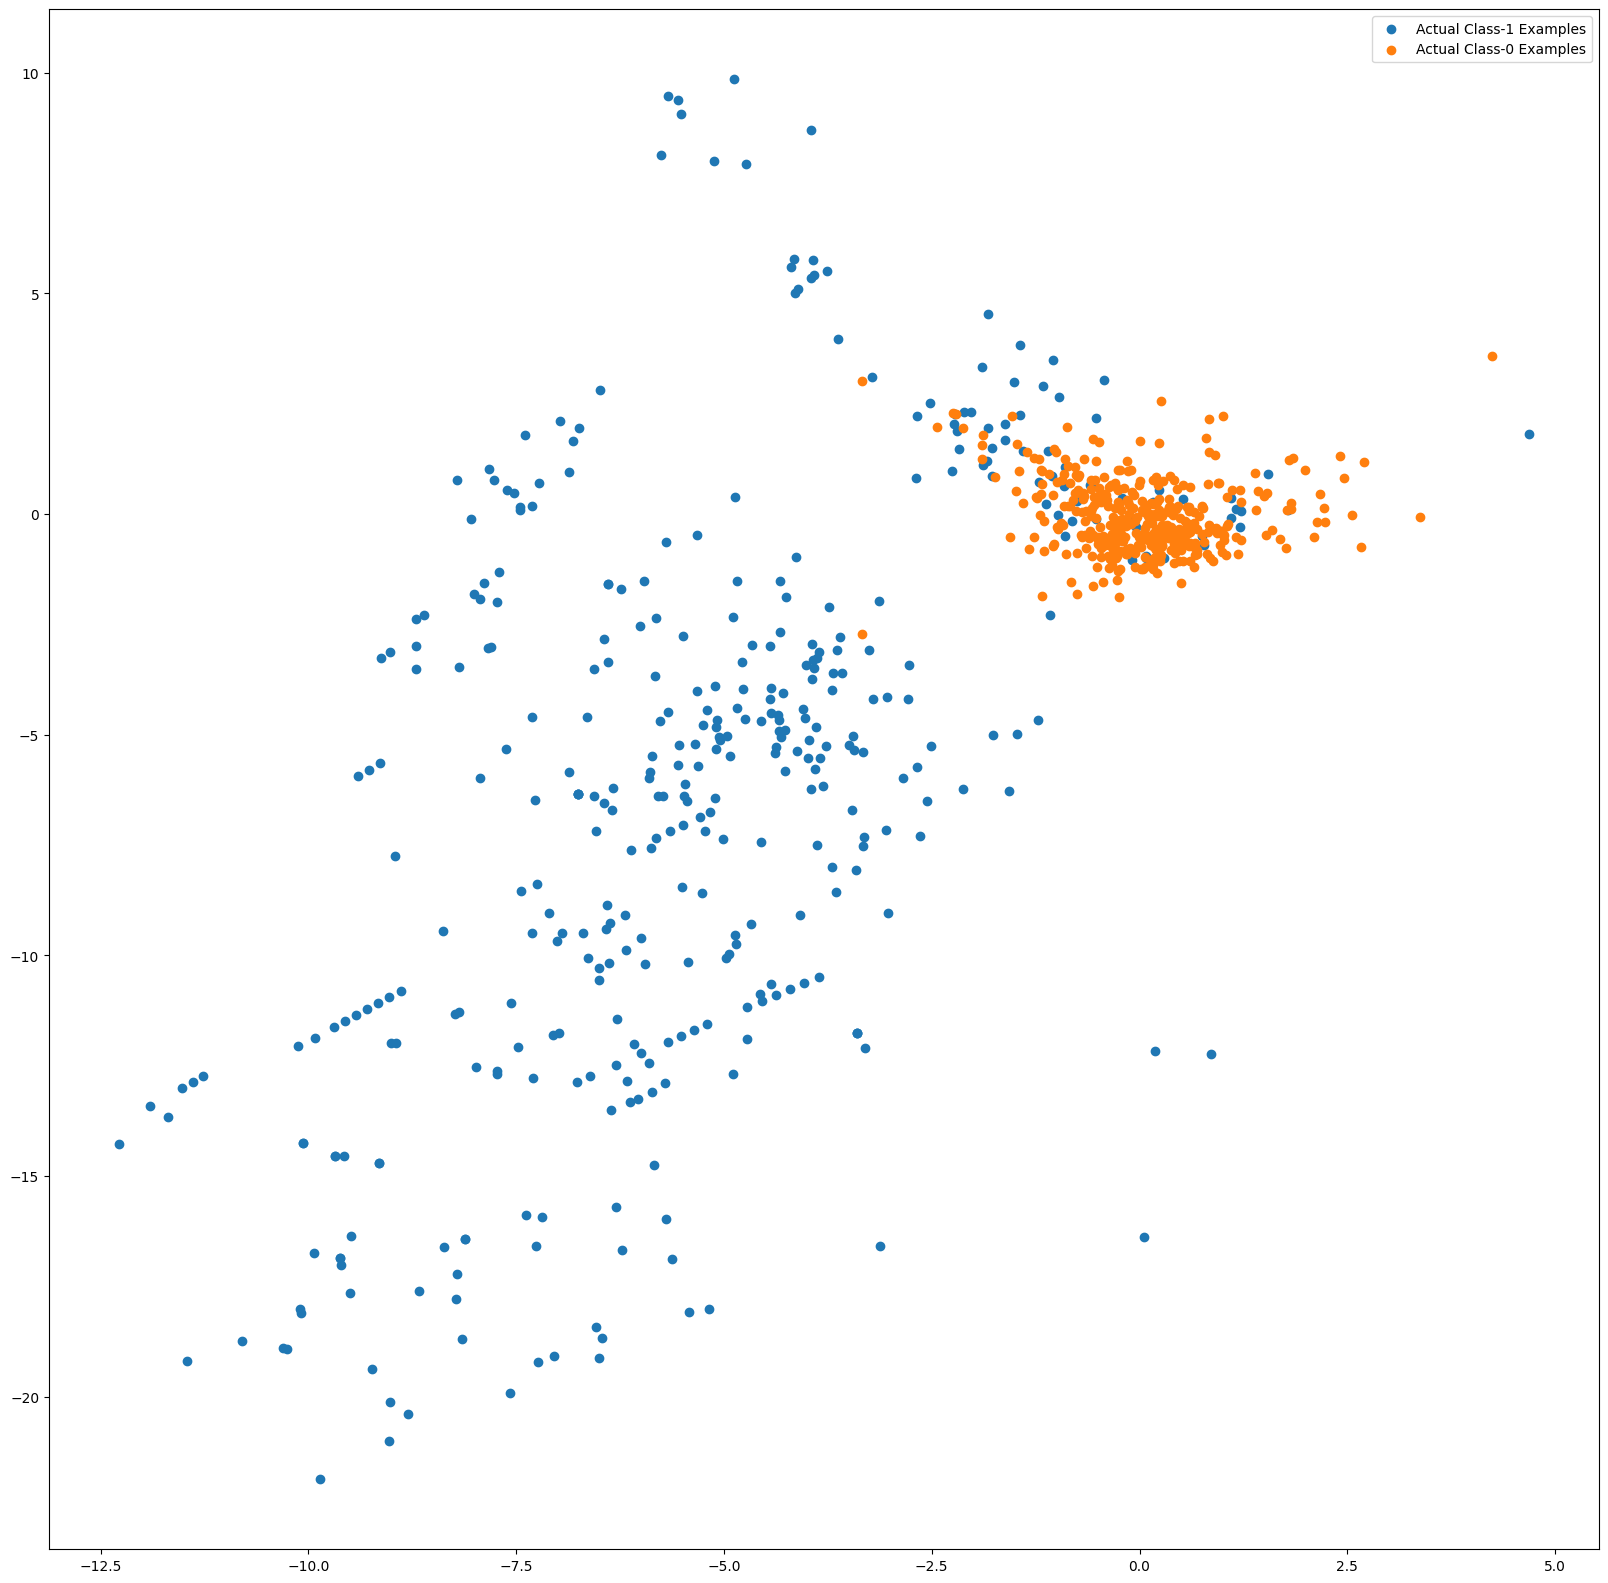

In [24]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [25]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = [0.01, 0.1, 1, 10] #--> list of values
cv_num = [3,5]  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [26]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.over_sampling import RandomOverSampler #- import the packages

print(f"--- Random Oversampling on FULL Training Data ---")
ros = RandomOverSampler(random_state=42)

print(f"Before balancing: {y_train.value_counts().to_dict()}")
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)
print(f"After balancing:  {pd.Series(y_train_balanced).value_counts().to_dict()}")

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
print("Logistic Regression with Random Oversampling")
lr = LogisticRegression(random_state=42)

#perform hyperparameter tuning
param_grid = {
        'C': num_C,
        'max_iter': [1000],
        'penalty': ['l2']
    }

print(f"\n--- Hyperparameter Tuning (cv={cv_num}) on Balanced Data ---")
cv_balanced_results = {}

for cv_folds in cv_num:
    print(f"\n--- CV-{cv_folds}-Fold on Balanced Data ---")
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    grid = HalvingGridSearchCV(lr, param_grid, cv=skf, scoring='roc_auc', n_jobs=-1, min_resources='smallest', resource='n_samples', factor=3)
    grid.fit(X_train_balanced, y_train_balanced)
    
    cv_balanced_results[cv_folds] = {
        'roc_auc': grid.best_score_,
        'params': grid.best_params_,
        'model': grid.best_estimator_
    }
    
    print(f"  ROC_AUC: {grid.best_score_:.3f}")
    print(f"  PARAMS: {grid.best_params_}")

best_cv = max(cv_balanced_results.keys(), key=lambda k: cv_balanced_results[k]['roc_auc'])
best_model = cv_balanced_results[best_cv]['model']
best_params = cv_balanced_results[best_cv]['params']

#print the evaluation result by choosing a evaluation metric
y_pred_test = best_model.predict(X_test)
y_proba_test = best_model.predict_proba(X_test)[:, 1]

test_roc_auc = roc_auc_score(y_test, y_proba_test)
test_recall = recall_score(y_test, y_pred_test)

print(f"\nEVALUATION RESULTS:")
print(f"Balanced Train ROC_AUC: {cv_balanced_results[best_cv]['roc_auc']:.3f}")
print(f"Balanced Test ROC_AUC: {test_roc_auc:<9.3f}")

print(f"\nTest Classification Report:")
print(classification_report(y_test, y_pred_test))

#print the optimum value of hyperparameters
print(f"\n BEST MODEL SELECTED:")
print(f"CV folds: {best_cv} (from cv=[3,5])")
print(f"\n OPTIMUM HYPERPARAMETERS: {best_params}")

--- Random Oversampling on FULL Training Data ---
Before balancing: {0: 227451, 1: 394}
After balancing:  {0: 227451, 1: 227451}
Logistic Regression with Random Oversampling

--- Hyperparameter Tuning (cv=[3, 5]) on Balanced Data ---

--- CV-3-Fold on Balanced Data ---
  ROC_AUC: 0.938
  PARAMS: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}

--- CV-5-Fold on Balanced Data ---
  ROC_AUC: 0.974
  PARAMS: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}

EVALUATION RESULTS:
Balanced Train ROC_AUC: 0.974
Balanced Test ROC_AUC: 0.973    

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962


 BEST MODEL SELECTED:
CV folds: 5 (from cv=[3,5])

 OPTIMUM HYPERPARAMETERS: {'C': 1, 'max_iter': 1000, 'penalt

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [31]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import SGDClassifier

print("ALGORITHM COMPARISON on BALANCED Dataset (Random Oversampling)")
print("KNN, SGD SVM, Decision Tree, Random Forest, XGBoost")

algorithms = {
    'KNN': KNeighborsClassifier(),
    'SGD SVM': SGDClassifier(random_state=42, max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='auc', tree_method='hist')
}

param_grids = {
    'KNN': {'n_neighbors': [5,7], 'weights':['distance']},
    'SGD SVM': {  
        'alpha': [0.001],      
        'loss': ['log_loss'], 
        'penalty': ['l2'],             
        'learning_rate': ['optimal']
    },
    'Decision Tree': {'max_depth': [5, 7], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 5], 'max_features':['log2'],'splitter':['random']},
    'Random Forest': {'n_estimators': [500, 700], 'max_depth': [20, 30], 'min_samples_leaf': [10, 20], 'max_samples': [0.8],'max_features':['sqrt']},
    'XGBoost': {'n_estimators': [500, 700], 'max_depth': [20,30], 'learning_rate': [0.05], 'subsample': [0.8], 'colsample_bytree': [0.8]}
}

print("COMPREHENSIVE ALGORITHM COMPARISON")
print(f" Using framework: cv_num={cv_num}, ROC_AUC scoring")
print("=" * 80)

all_results = {}
for algo_name, model in algorithms.items():
    print(f"\n {algo_name}")
    
    cv_comparison = {}
    for n_splits in cv_num:
        print(f"  --- {n_splits}-Fold CV ---")
        
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        grid_search = HalvingGridSearchCV(model, param_grids[algo_name], 
                                          cv=skf, scoring='roc_auc', n_jobs=-1, min_resources=200, 
                                          resource='n_samples', factor=2)
        grid_search.fit(X_train_balanced, y_train_balanced)
        
        cv_comparison[n_splits] = {
            'roc_auc': grid_search.best_score_,
            'params': grid_search.best_params_,
            'estimator': grid_search.best_estimator_
        }
        print(f"    CV-{n_splits} ROC_AUC: {grid_search.best_score_:.3f}")
    
    # Best CV for this algorithm
    best_cv_algo = max(cv_comparison.keys(), key=lambda k: cv_comparison[k]['roc_auc'])
    all_results[algo_name] = cv_comparison[best_cv_algo]
    
    print(f"  BEST for {algo_name}: CV-{best_cv_algo} = {cv_comparison[best_cv_algo]['roc_auc']:.3f}")

# GRAND CHAMPION
best_algo = max(all_results.keys(), key=lambda k: all_results[k]['roc_auc'])
best_model_overall = all_results[best_algo]['estimator']

print(f"\nGRAND CHAMPION: {best_algo}")
print(f" Best ROC_AUC: {all_results[best_algo]['roc_auc']:.3f}")
print(f" Best hyperparameters: {all_results[best_algo]['params']}")

# Final test evaluation for ALL algorithms (FIXED: use X_test_transformed)
print(f"\nTEST SET PERFORMANCE (ALL ALGORITHMS):")
print(f" {'Algorithm':<15} {'Train ROC':<10} {'Test ROC':<9} {'Recall'}")
print("-" * 45)
for algo_name in all_results:
    model = all_results[algo_name]['estimator']
    y_proba_test = model.predict_proba(X_test)[:, 1]
    y_pred_test = model.predict(X_test)
    test_roc = roc_auc_score(y_test, y_proba_test)
    test_recall = recall_score(y_test, y_pred_test)
    
    print(f"{algo_name:<15} {all_results[algo_name]['roc_auc']:<9.3f} {test_roc:<8.3f} {test_recall:.3f}")

print(f"\nBEST MODEL: {best_algo}")

ALGORITHM COMPARISON on BALANCED Dataset (Random Oversampling)
KNN, SGD SVM, Decision Tree, Random Forest, XGBoost
COMPREHENSIVE ALGORITHM COMPARISON
 Using framework: cv_num=[3, 5], ROC_AUC scoring

 KNN
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.969
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.965
  BEST for KNN: CV-3 = 0.969

 SGD SVM
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.966
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.951
  BEST for SGD SVM: CV-3 = 0.966

 Decision Tree
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.922
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.917
  BEST for Decision Tree: CV-3 = 0.922

 Random Forest
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.987
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.991
  BEST for Random Forest: CV-5 = 0.991

 XGBoost
  --- 3-Fold CV ---


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:774: UserWarning: [12:46:14] WARNING: /workspace/src/common/error_msg.cc:41: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/usr/local/lib/python3.12/dist-packages/xgboost/core.py:774: UserWarning: [12:46:14] WARNING: /workspace/src/common/error_msg.cc:41: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before

    CV-3 ROC_AUC: 0.992
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.996
  BEST for XGBoost: CV-5 = 0.996

GRAND CHAMPION: XGBoost
 Best ROC_AUC: 0.996
 Best hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 30, 'n_estimators': 700, 'subsample': 0.8}

TEST SET PERFORMANCE (ALL ALGORITHMS):
 Algorithm       Train ROC  Test ROC  Recall
---------------------------------------------
KNN             0.969     0.949    0.867
SGD SVM         0.966     0.974    0.918
Decision Tree   0.922     0.898    0.816
Random Forest   0.991     0.971    0.837
XGBoost         0.996     0.978    0.857

BEST MODEL: XGBoost


### Print the class distribution after applying SMOTE 

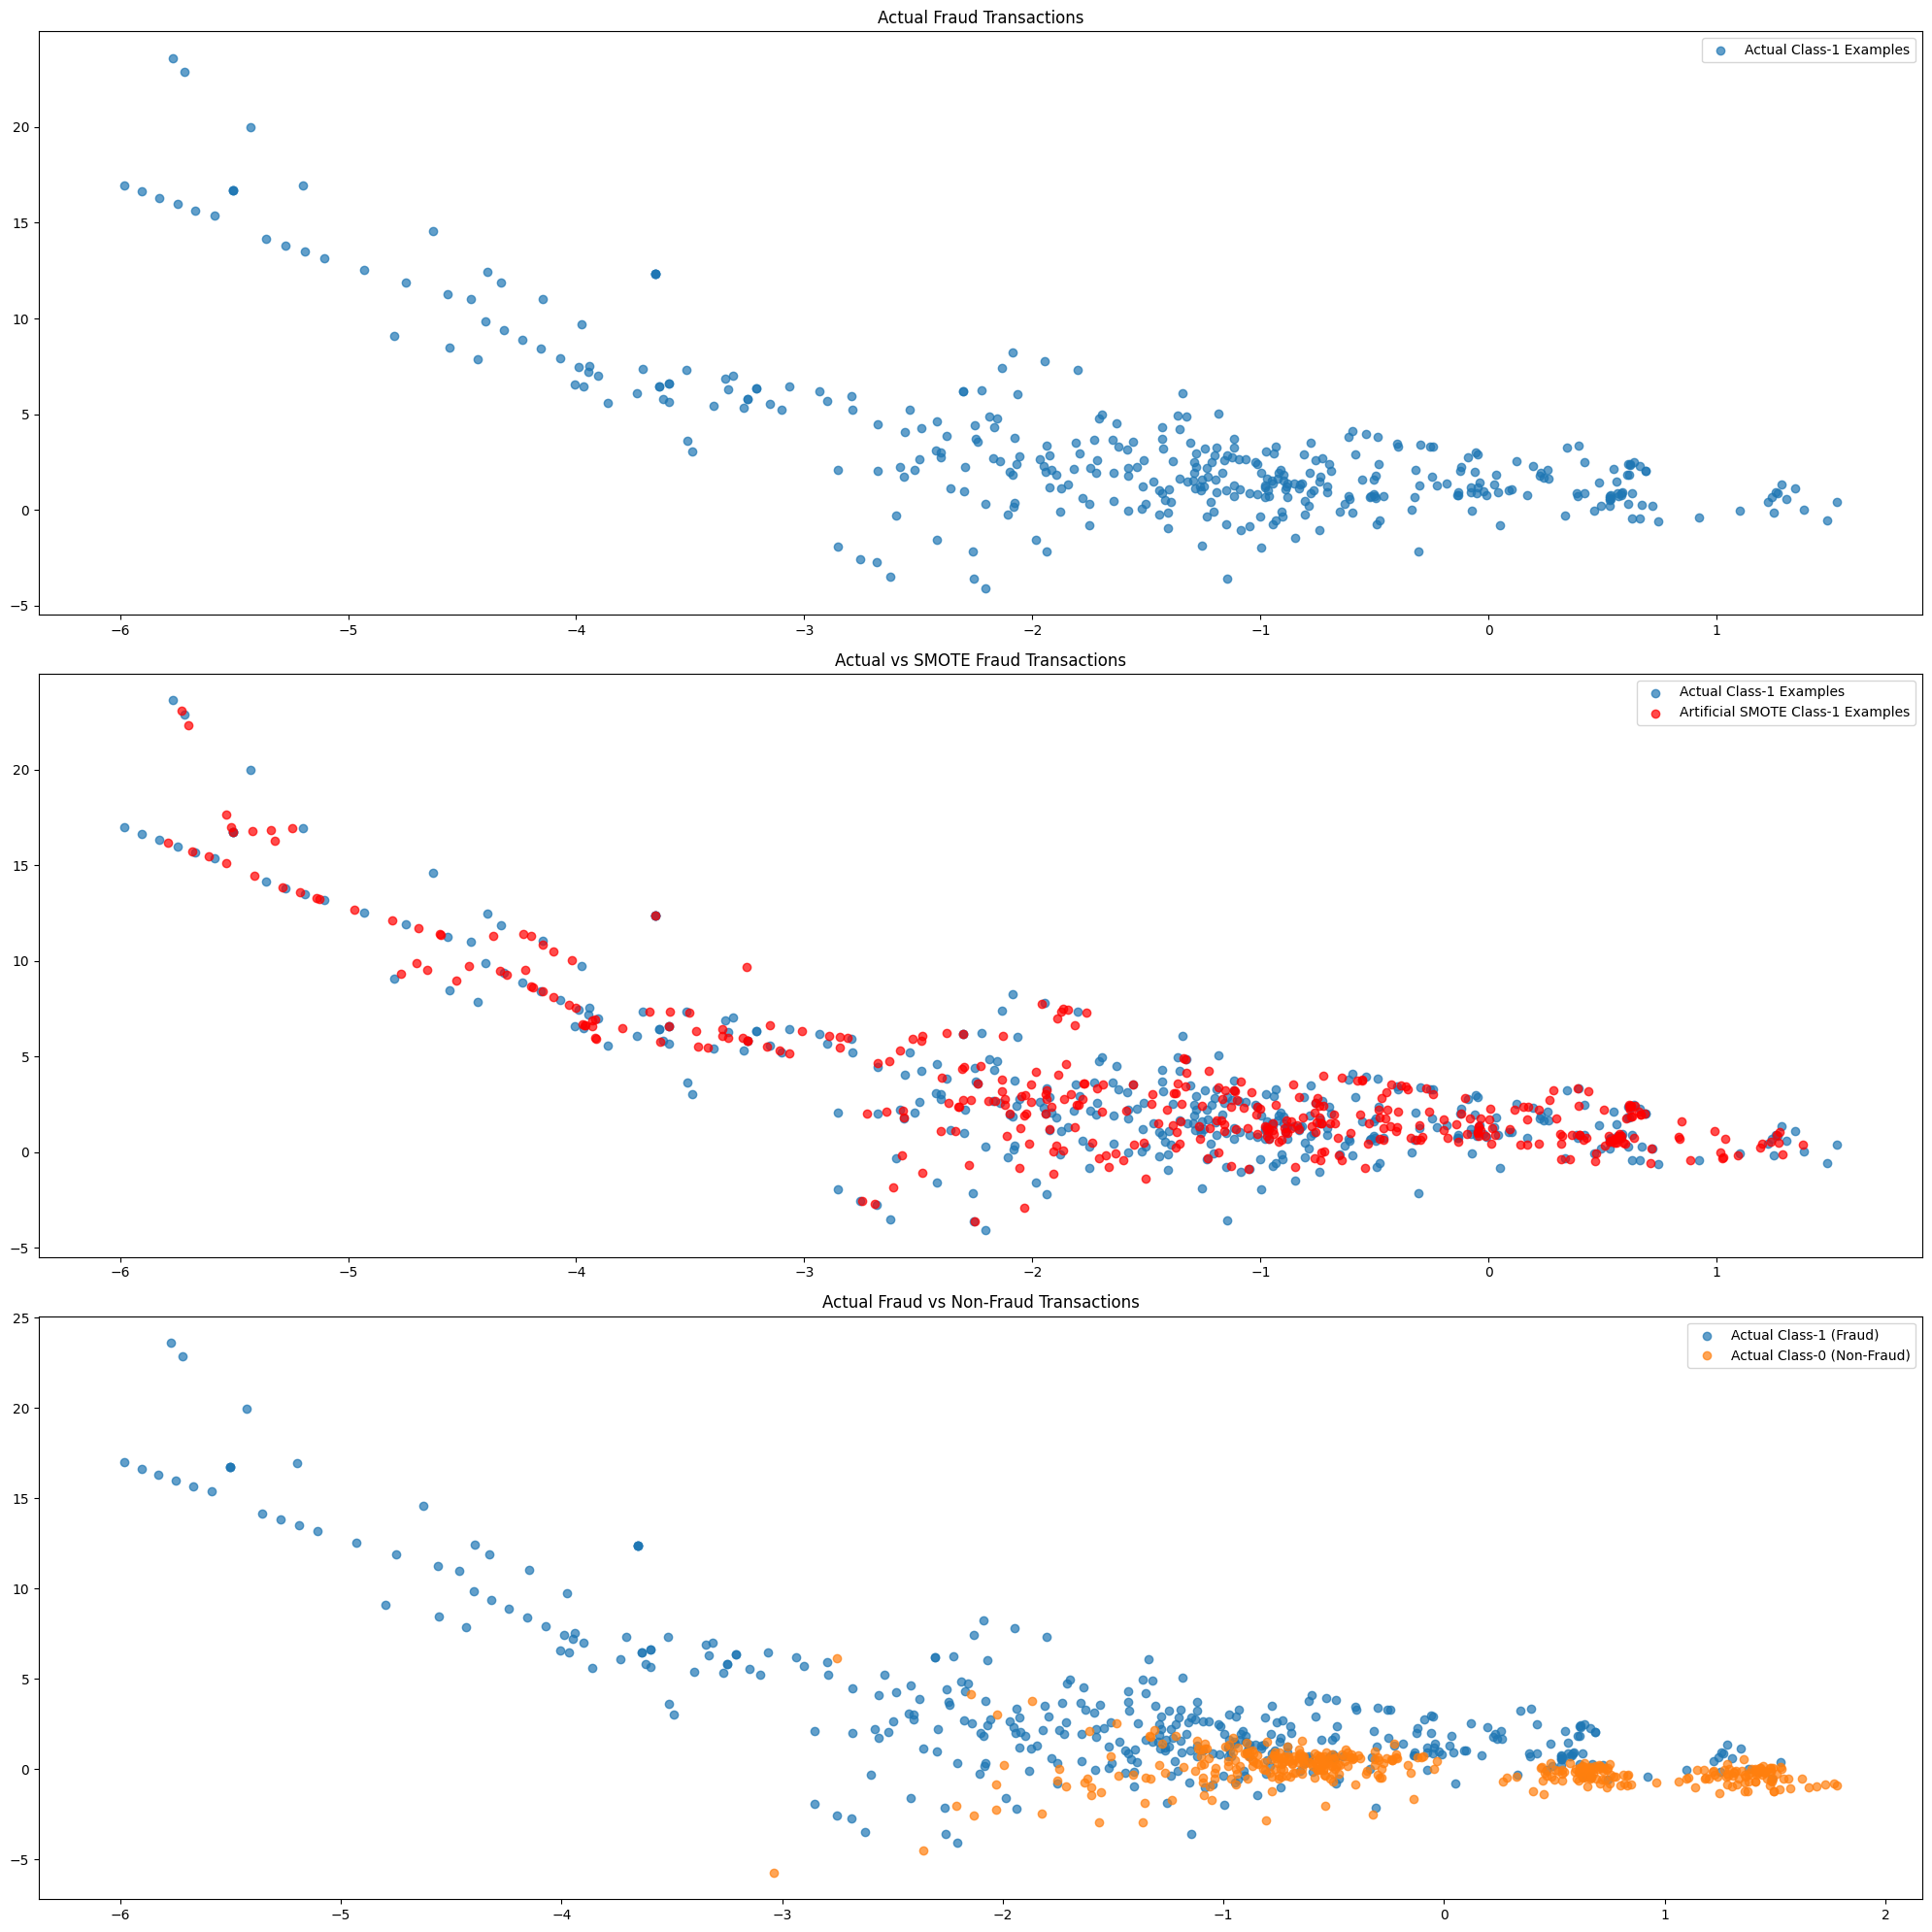

SMOTE Success!
 Original: 394 fraud / 227845 total (0.17%)
 SMOTE:   227451 fraud / 454902 total (50%)


In [36]:
import warnings
warnings.filterwarnings("ignore")  
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Convert to NumPy arrays for indexing
X_train_smote_np = X_train_smote.to_numpy() if hasattr(X_train_smote, 'to_numpy') else X_train_smote.values
X_train_np = X_train.to_numpy()

# Extract artificial minority samples (fraud)
X_train_smote_1 = X_train_smote_np[X_train.shape[0]:]
X_train_1 = X_train_np[np.where(y_train == 1.0)]  # Actual fraud
X_train_0 = X_train_np[np.where(y_train == 0.0)]  # Actual non-fraud

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', alpha=0.7)
plt.title('Actual Fraud Transactions')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', alpha=0.7)
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples', alpha=0.7, color='red')
plt.title('Actual vs SMOTE Fraud Transactions')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 (Fraud)', alpha=0.7)
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], 
            label='Actual Class-0 (Non-Fraud)', alpha=0.7)
plt.title('Actual Fraud vs Non-Fraud Transactions')
plt.legend()

plt.tight_layout()
plt.show()

print(f"SMOTE Success!")
print(f" Original: {y_train.sum()} fraud / {len(y_train)} total ({y_train.mean():.2%})")
print(f" SMOTE:   {y_train_smote.sum()} fraud / {len(y_train_smote)} total (50%)")

In [38]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

print("ALGORITHM COMPARISON on BALANCED Dataset (SMOTE)")
print("Logistic Regression, KNN, SGD SVM, Decision Tree, Random Forest, XGBoost")

algorithms = {
    'Logistic': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SGD SVM': SGDClassifier(random_state=42, max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='auc', tree_method='hist')
}

param_grids = {
    'Logistic' : {'C': num_C,'max_iter': [2000],'penalty': ['l2']},
    'KNN': {'n_neighbors': [5,7], 'weights':['distance']},
    'SGD SVM': {  
        'alpha': [0.001],      
        'loss': ['log_loss'], 
        'penalty': ['l2'],             
        'learning_rate': ['optimal']
    },
    'Decision Tree': {'max_depth': [5, 7], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 5], 'max_features':['log2'],'splitter':['random']},
    'Random Forest': {'n_estimators': [500, 700], 'max_depth': [20, 30], 'min_samples_leaf': [10, 20], 'max_samples': [0.8],'max_features':['sqrt']},
    'XGBoost': {'n_estimators': [500, 700], 'max_depth': [20,30], 'learning_rate': [0.05], 'subsample': [0.8], 'colsample_bytree': [0.8]}
}

print("COMPREHENSIVE ALGORITHM COMPARISON")
print(f" Using framework: cv_num={cv_num}, ROC_AUC scoring")
print("=" * 80)

all_results = {}
for algo_name, model in algorithms.items():
    print(f"\n {algo_name}")
    
    cv_comparison = {}
    for n_splits in cv_num:
        print(f"  --- {n_splits}-Fold CV ---")
        
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        grid_search = HalvingGridSearchCV(model, param_grids[algo_name], 
                                          cv=skf, scoring='roc_auc', n_jobs=-1, min_resources=200, 
                                          resource='n_samples', factor=2)
        grid_search.fit(X_train_smote, y_train_smote)
        
        cv_comparison[n_splits] = {
            'roc_auc': grid_search.best_score_,
            'params': grid_search.best_params_,
            'estimator': grid_search.best_estimator_
        }
        print(f"    CV-{n_splits} ROC_AUC: {grid_search.best_score_:.3f}")
    
    # Best CV for this algorithm
    best_cv_algo = max(cv_comparison.keys(), key=lambda k: cv_comparison[k]['roc_auc'])
    all_results[algo_name] = cv_comparison[best_cv_algo]
    
    print(f"  BEST for {algo_name}: CV-{best_cv_algo} = {cv_comparison[best_cv_algo]['roc_auc']:.3f}")

# GRAND CHAMPION
best_algo = max(all_results.keys(), key=lambda k: all_results[k]['roc_auc'])
best_model_overall = all_results[best_algo]['estimator']

print(f"\nGRAND CHAMPION: {best_algo}")
print(f" Best ROC_AUC: {all_results[best_algo]['roc_auc']:.3f}")
print(f" Best hyperparameters: {all_results[best_algo]['params']}")

# Final test evaluation for ALL algorithms (FIXED: use X_test_transformed)
print(f"\nTEST SET PERFORMANCE (ALL ALGORITHMS):")
print(f" {'Algorithm':<15} {'Train ROC':<10} {'Test ROC':<9} {'Recall'}")
print("-" * 45)
for algo_name in all_results:
    model = all_results[algo_name]['estimator']
    y_proba_test = model.predict_proba(X_test)[:, 1]
    y_pred_test = model.predict(X_test)
    test_roc = roc_auc_score(y_test, y_proba_test)
    test_recall = recall_score(y_test, y_pred_test)
    
    print(f"{algo_name:<15} {all_results[algo_name]['roc_auc']:<9.3f} {test_roc:<8.3f} {test_recall:.3f}")

print(f"\nBEST MODEL: {best_algo}")

ALGORITHM COMPARISON on BALANCED Dataset (SMOTE)
Logistic Regression, KNN, SGD SVM, Decision Tree, Random Forest, XGBoost
COMPREHENSIVE ALGORITHM COMPARISON
 Using framework: cv_num=[3, 5], ROC_AUC scoring

 Logistic
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.989
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.988
  BEST for Logistic: CV-3 = 0.989

 KNN
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.992
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.991
  BEST for KNN: CV-3 = 0.992

 SGD SVM
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.980
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.980
  BEST for SGD SVM: CV-5 = 0.980

 Decision Tree
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.946
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.922
  BEST for Decision Tree: CV-3 = 0.946

 Random Forest
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.984
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.992
  BEST for Random Forest: CV-5 = 0.992

 XGBoost
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.989
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.995
  BEST for XGBoost: CV-

##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN

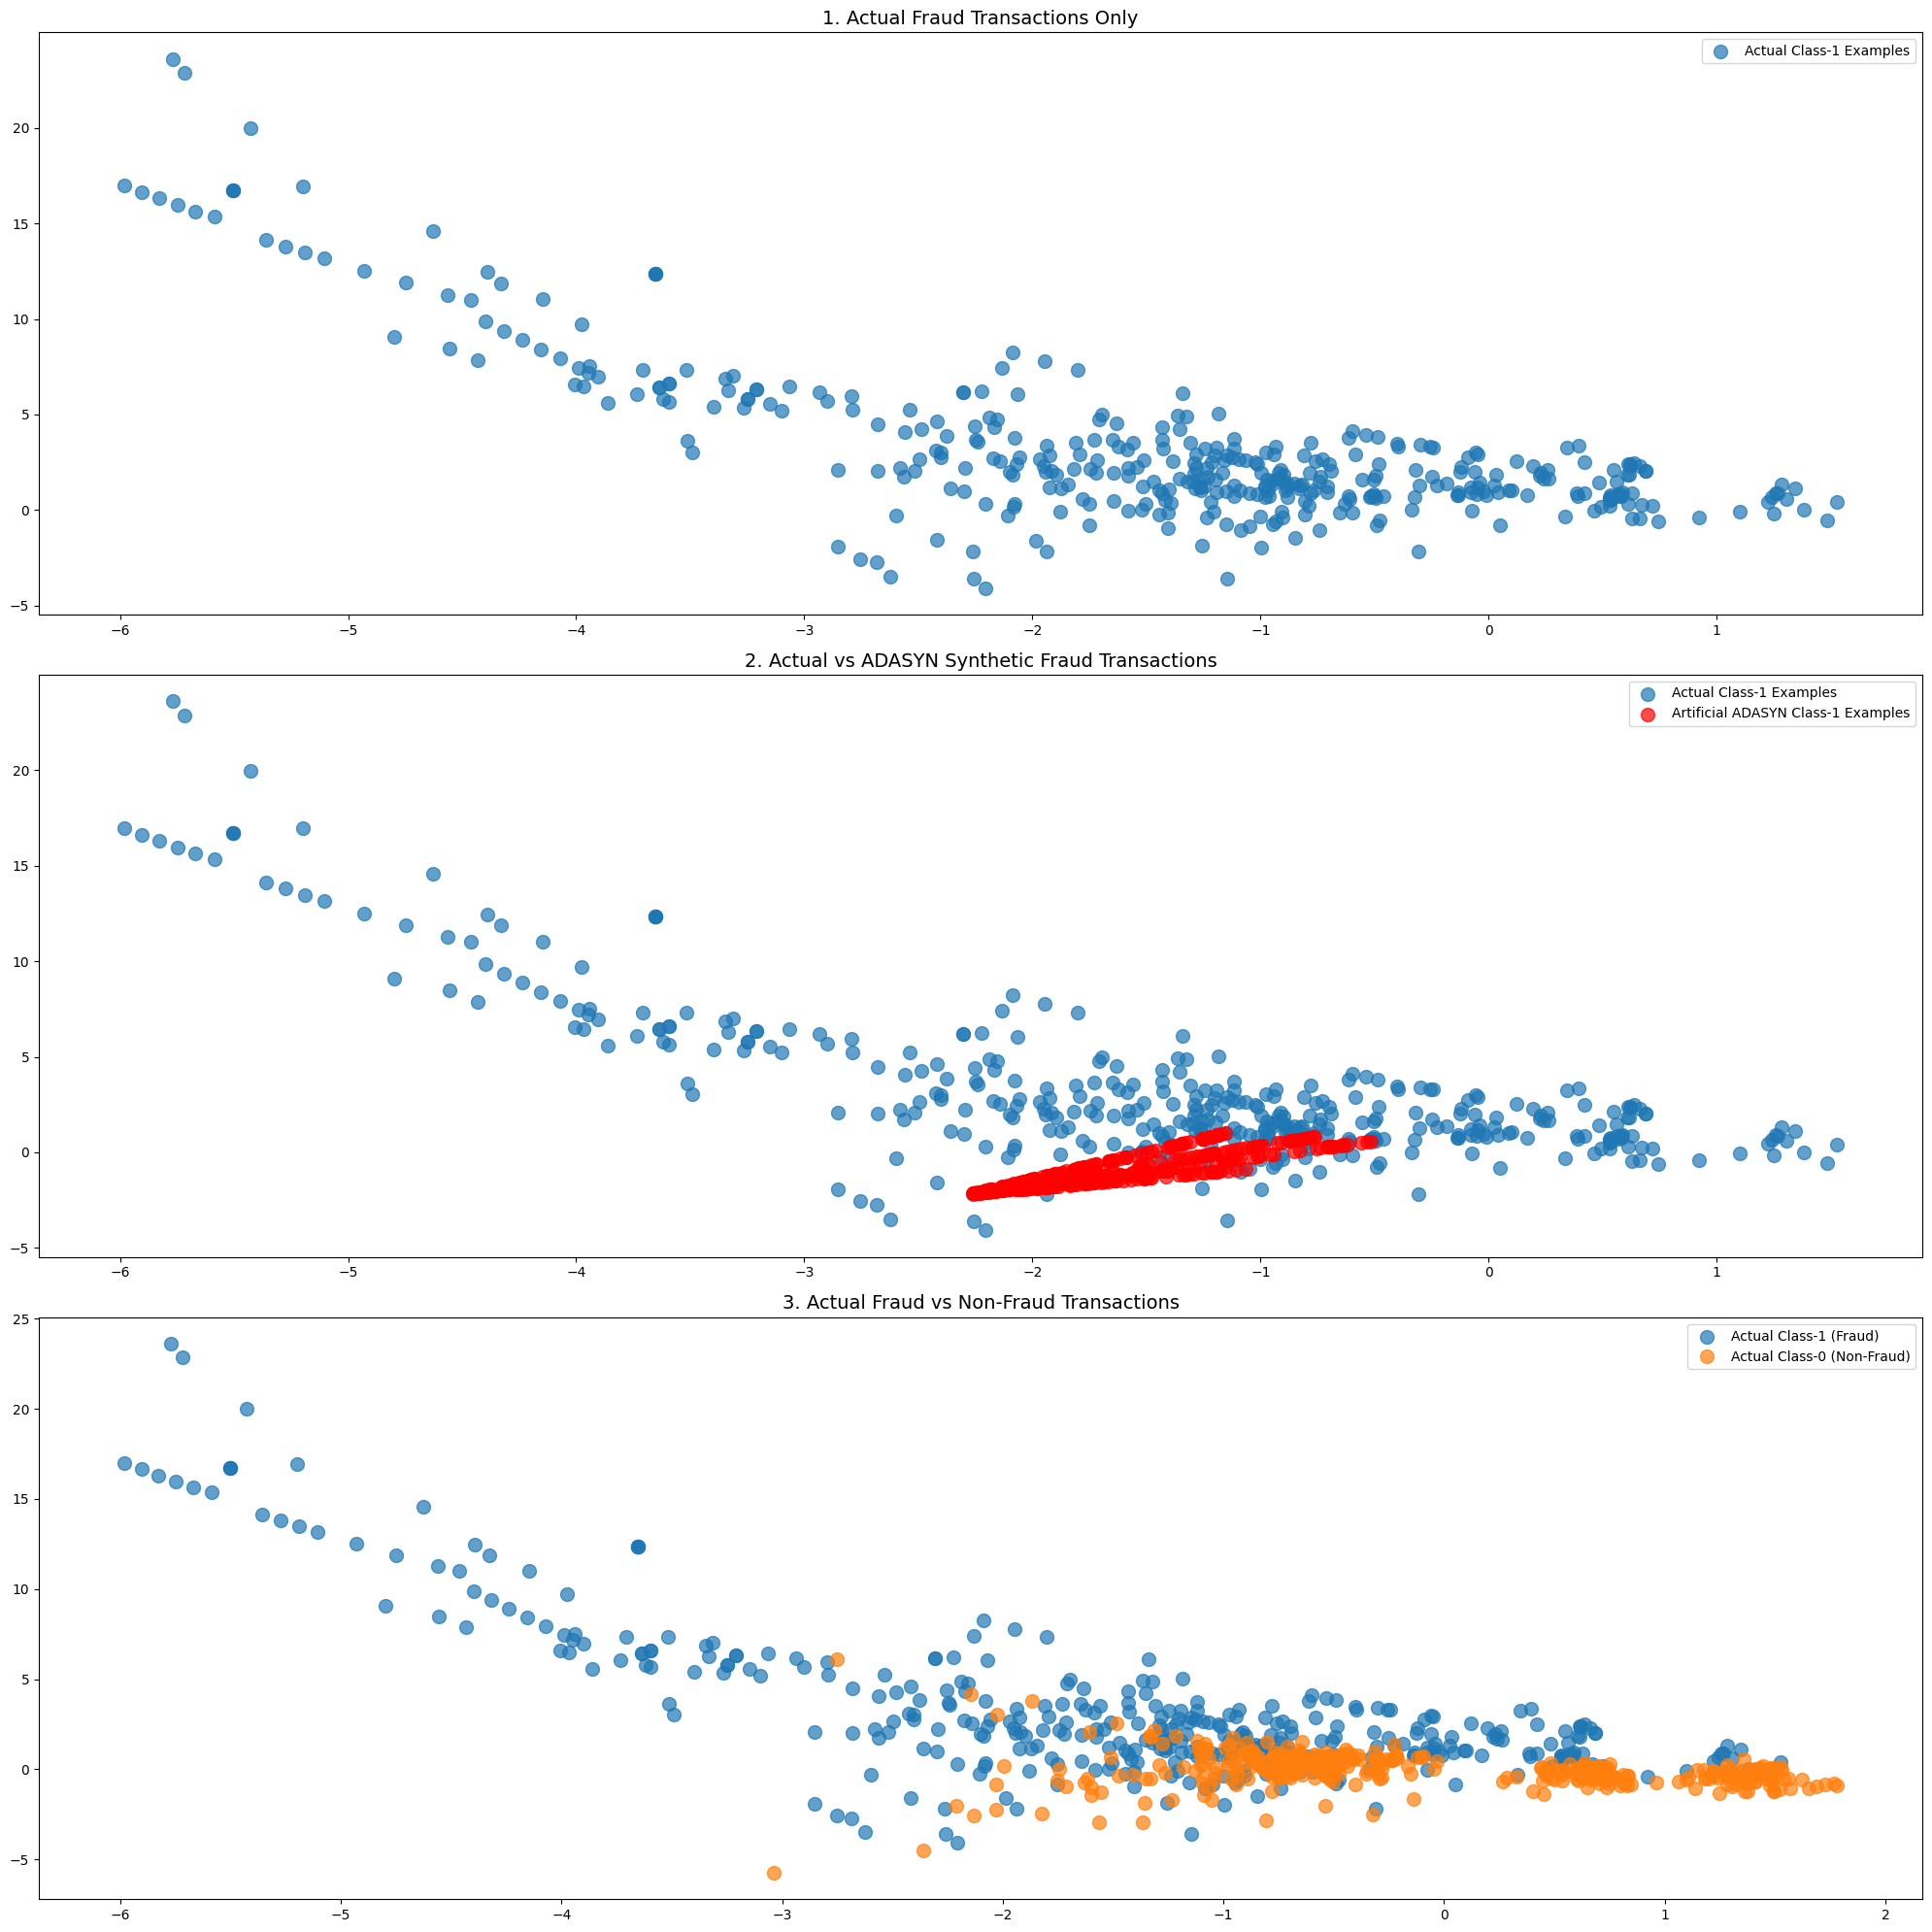

ADASYN Success!
 Original:     394 fraud / 227845 total (0.17%)
 ADASYN:      227459 fraud / 454910 total (50.00%)
 Synthetic:   227065 artificial fraud samples created


In [48]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import ADASYN

# ADASYN balancing
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# Convert to NumPy arrays
X_train_adasyn_np = X_train_adasyn.to_numpy() if hasattr(X_train_adasyn, 'to_numpy') else X_train_adasyn.values
X_train_np = X_train.to_numpy()

# Extract artificial minority samples (fraud)
X_train_adasyn_1 = X_train_adasyn_np[X_train.shape[0]:]  # Synthetic fraud samples
X_train_1 = X_train_np[np.where(y_train == 1.0)]         # Actual fraud
X_train_0 = X_train_np[np.where(y_train == 0.0)]         # Actual non-fraud

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', alpha=0.7, s=100)
plt.title('1. Actual Fraud Transactions Only', fontsize=14)
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples', alpha=0.7, s=100)
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples', alpha=0.7, s=100, color='red')
plt.title('2. Actual vs ADASYN Synthetic Fraud Transactions', fontsize=14)
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 (Fraud)', alpha=0.7, s=100)
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], 
            label='Actual Class-0 (Non-Fraud)', alpha=0.7, s=100)
plt.title('3. Actual Fraud vs Non-Fraud Transactions', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

print(f"ADASYN Success!")
print(f" Original:     {y_train.sum()} fraud / {len(y_train)} total ({y_train.mean():.2%})")
print(f" ADASYN:      {y_train_adasyn.sum()} fraud / {len(y_train_adasyn)} total ({y_train_adasyn.mean():.2%})")
print(f" Synthetic:   {len(X_train_adasyn_1)} artificial fraud samples created")

In [49]:

#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN
#perform hyperparameter tuning
print("ALGORITHM COMPARISON on BALANCED Dataset (ADASYN)")
print("Logistic Regression, KNN, SGD SVM, Decision Tree, Random Forest, XGBoost")

algorithms = {
    'Logistic': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SGD SVM': SGDClassifier(random_state=42, max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='auc', tree_method='hist')
}

param_grids = {
    'Logistic' : {'C': num_C,'max_iter': [2000],'penalty': ['l2']},
    'KNN': {'n_neighbors': [5,7], 'weights':['distance']},
    'SGD SVM': {  
        'alpha': [0.001],      
        'loss': ['log_loss'], 
        'penalty': ['l2'],             
        'learning_rate': ['optimal']
    },
    'Decision Tree': {'max_depth': [5, 7], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 5], 'max_features':['log2'],'splitter':['random']},
    'Random Forest': {'n_estimators': [500, 700], 'max_depth': [20, 30], 'min_samples_leaf': [10, 20], 'max_samples': [0.8],'max_features':['sqrt']},
    'XGBoost': {'n_estimators': [500, 700], 'max_depth': [20,30], 'learning_rate': [0.05], 'subsample': [0.8], 'colsample_bytree': [0.8]}
}

print("COMPREHENSIVE ALGORITHM COMPARISON")
print(f" Using framework: cv_num={cv_num}, ROC_AUC scoring")
print("=" * 80)

all_results = {}
for algo_name, model in algorithms.items():
    print(f"\n {algo_name}")
    
    cv_comparison = {}
    for n_splits in cv_num:
        print(f"  --- {n_splits}-Fold CV ---")
        
        skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        grid_search = HalvingGridSearchCV(model, param_grids[algo_name], 
                                          cv=skf, scoring='roc_auc', n_jobs=-1, min_resources=200, 
                                          resource='n_samples', factor=2)
        grid_search.fit(X_train_adasyn, y_train_adasyn)
        
        cv_comparison[n_splits] = {
            'roc_auc': grid_search.best_score_,
            'params': grid_search.best_params_,
            'estimator': grid_search.best_estimator_
        }
        print(f"    CV-{n_splits} ROC_AUC: {grid_search.best_score_:.3f}")
    
    # Best CV for this algorithm
    best_cv_algo = max(cv_comparison.keys(), key=lambda k: cv_comparison[k]['roc_auc'])
    all_results[algo_name] = cv_comparison[best_cv_algo]
    
    print(f"  BEST for {algo_name}: CV-{best_cv_algo} = {cv_comparison[best_cv_algo]['roc_auc']:.3f}")

# GRAND CHAMPION
best_algo = max(all_results.keys(), key=lambda k: all_results[k]['roc_auc'])
best_model_overall = all_results[best_algo]['estimator']

print(f"\nGRAND CHAMPION: {best_algo}")
print(f" Best ROC_AUC: {all_results[best_algo]['roc_auc']:.3f}")
print(f" Best hyperparameters: {all_results[best_algo]['params']}")

# Final test evaluation for ALL algorithms (FIXED: use X_test_transformed)
print(f"\nTEST SET PERFORMANCE (ALL ALGORITHMS):")
print(f" {'Algorithm':<15} {'Train ROC':<10} {'Test ROC':<9} {'Recall'}")
print("-" * 45)
for algo_name in all_results:
    model = all_results[algo_name]['estimator']
    y_proba_test = model.predict_proba(X_test)[:, 1]
    y_pred_test = model.predict(X_test)
    test_roc = roc_auc_score(y_test, y_proba_test)
    test_recall = recall_score(y_test, y_pred_test)
    
    print(f"{algo_name:<15} {all_results[algo_name]['roc_auc']:<9.3f} {test_roc:<8.3f} {test_recall:.3f}")

print(f"\nBEST MODEL: {best_algo}")

ALGORITHM COMPARISON on BALANCED Dataset (ADASYN)
Logistic Regression, KNN, SGD SVM, Decision Tree, Random Forest, XGBoost
COMPREHENSIVE ALGORITHM COMPARISON
 Using framework: cv_num=[3, 5], ROC_AUC scoring

 Logistic
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.958
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.962
  BEST for Logistic: CV-5 = 0.962

 KNN
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.958
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.978
  BEST for KNN: CV-5 = 0.978

 SGD SVM
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.904
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.956
  BEST for SGD SVM: CV-5 = 0.956

 Decision Tree
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.808
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.831
  BEST for Decision Tree: CV-5 = 0.831

 Random Forest
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.980
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.985
  BEST for Random Forest: CV-5 = 0.985

 XGBoost
  --- 3-Fold CV ---
    CV-3 ROC_AUC: 0.985
  --- 5-Fold CV ---
    CV-5 ROC_AUC: 0.992
  BEST for XGBoost: CV

##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### From the Random Sampling, SMOTE and ADASYN methods - ADASYN is best over sampling method and XGBoost is best Model,based on the metrics - `ROC_AUC`

In [50]:
# perform the best oversampling method on X_train & y_train
#initialise the model with optimum hyperparameters
clf = XGBClassifier(
    n_estimators=500,           # Optimal number of trees
    max_depth=30,               # Optimal tree depth  
    learning_rate=0.05,         # Optimal learning rate
    subsample=0.8,              # Optimal row sampling
    colsample_bytree=0.8,       # Optimal column sampling
    random_state=42,
    eval_metric='auc',          # ROC_AUC monitoring
    n_jobs=-1,                  # Parallel training
    verbosity=1                 # Training progress
)


#print the evaluation score on the X_test by choosing the best evaluation metric
print("TRAINING BEST MODEL: XGBoost (Optimal Hyperparameters) with oversampling method - ADASYN")
print(" Hyperparameters: ", all_results[best_algo]['params'])
clf.fit(X_train_adasyn, y_train_adasyn) # fit on the balanced dataset

# Predict on test dataset
#print the evaluation score on the X_test by choosing the best evaluation metric
y_pred_test = clf.predict(X_test)
y_proba_test = clf.predict_proba(X_test)[:, 1]

# BEST evaluation metrics for fraud detection
test_roc_auc = roc_auc_score(y_test, y_proba_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

print(f"\nEVALUATION SCORES on X_test (BEST METRICS):")
print(f" {'ROC_AUC':<12}: {test_roc_auc:.3f}")
print(f" {'Recall':<12}: {test_recall:.3f}")
print(f" {'Precision':<12}: {test_precision:.3f}")
print(f" {'F1-Score':<12}: {test_f1:.3f}")

print(f"\nDETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_test))

# Feature importance (XGBoost bonus)
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': clf.feature_importances_
}).sort_values('importance', ascending=False).head(10)

print(f"\nTOP 10 FEATURES (XGBoost):")
print(feature_importance)

TRAINING BEST MODEL: XGBoost (Optimal Hyperparameters) with oversampling method - ADASYN
 Hyperparameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 30, 'n_estimators': 500, 'subsample': 0.8}

EVALUATION SCORES on X_test (BEST METRICS):
 ROC_AUC     : 0.982
 Recall      : 0.847
 Precision   : 0.806
 F1-Score    : 0.826

DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.85      0.83        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962


TOP 10 FEATURES (XGBoost):
   feature  importance
13     V14    0.291222
3       V4    0.135457
9      V10    0.057898
6       V7    0.046940
16     V17    0.043065
7       V8    0.038985
11     V12    0.031781
19     V20    0.029355
2       V3    0.025977
25     V26    0.025159


Top var = 14
2nd Top var = 4
3rd Top var = 10


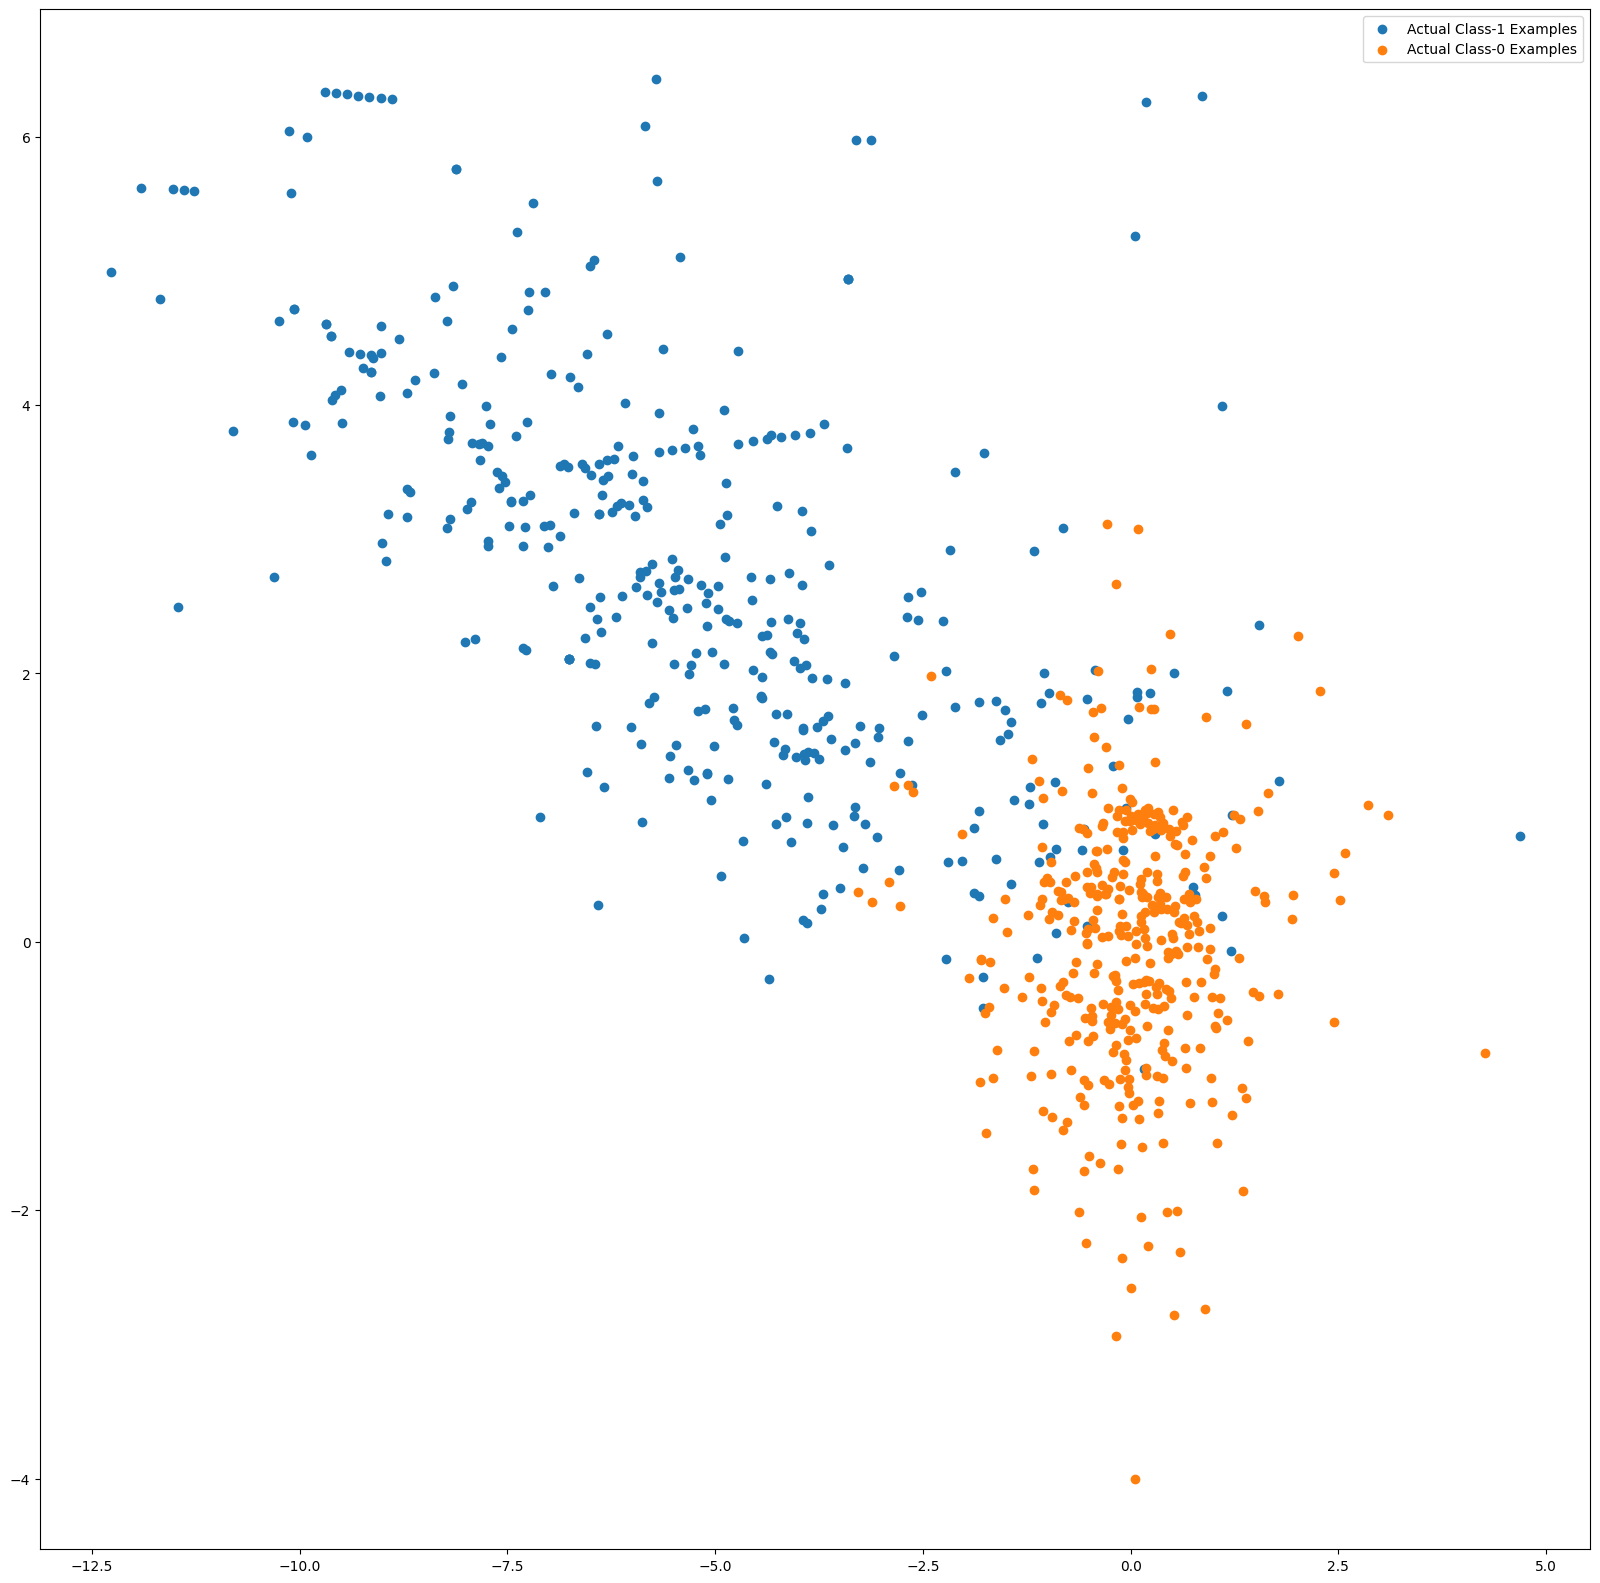

In [51]:
### Print the important features of the best model to understand the dataset
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [53]:
#### Print the FPR,TPR & select the best threshold from the roc curve
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, clf.predict_proba(X_train_adasyn)[:, 1]))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba_test)
threshold = thresholds[np.argmax(tpr-fpr)]
print('Optimal threshold =', threshold)

Train auc = 1.0
Optimal threshold = 0.0011623269
